In [2]:
# API Requests
import pprint
import requests
import json
import time

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc
from scipy.stats import ttest_ind

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.colors as mcolors
import folium
import branca

# Geocoding
from api_keys import opencage_key
from api_keys import geoapify_key
from folium.plugins import MarkerCluster

In [3]:
# Create a file path
filepath_cards = "../Resources/full_dataframe.csv"
filepath_users = "../Resources/statelatlong.csv"

# Read in the data.
full_dataframe = pd.read_csv(filepath_cards)
statelatlong = pd.read_csv(filepath_users)

In [4]:
# Merging noth files on ID column
df = pd.merge(full_dataframe, statelatlong, left_on="state", right_on="State", how="inner")
df.head()

,client_id,current_age,birth_year,birth_month,gender,address,state,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,debt_to_income,State,Latitude,Longitude,City
0,825,53,1966,11,Female,"7481 Brydon Road, La Verne, CA, 91750, United ...",CA,34.15,-117.76,29278,59696,127613,787,5,2.137714,CA,37.271875,-119.270415,California
1,1746,53,1966,12,Female,"51-17 Redfield Street, New York, NY, 11362, Un...",NY,40.76,-73.74,37891,77254,191349,701,5,2.476881,NY,40.705626,-73.979680,New York
2,1718,81,1938,11,Female,"Nogales Street, West Covina, CA, 91792, United...",CA,34.02,-117.89,22681,33483,196,698,5,0.005854,CA,37.271875,-119.270415,California
3,708,63,1957,1,Female,"Market Slip, New York, NY, 10002, United State...",NY,40.71,-73.99,163145,249925,202328,722,4,0.809555,NY,40.705626,-73.979680,New York
4,1164,43,1976,9,Male,"24;26 Caselli Avenue, San Francisco, CA, 94114...",CA,37.76,-122.44,53797,109687,183855,675,1,1.676179,CA,37.271875,-119.270415,California


In [5]:
# Drop the specified columns
df = df.drop(columns=['State'])

# Checking the result after dropping the columns
df.head()

,client_id,current_age,birth_year,birth_month,gender,address,state,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,debt_to_income,Latitude,Longitude,City
0,825,53,1966,11,Female,"7481 Brydon Road, La Verne, CA, 91750, United ...",CA,34.15,-117.76,29278,59696,127613,787,5,2.137714,37.271875,-119.270415,California
1,1746,53,1966,12,Female,"51-17 Redfield Street, New York, NY, 11362, Un...",NY,40.76,-73.74,37891,77254,191349,701,5,2.476881,40.705626,-73.979680,New York
2,1718,81,1938,11,Female,"Nogales Street, West Covina, CA, 91792, United...",CA,34.02,-117.89,22681,33483,196,698,5,0.005854,37.271875,-119.270415,California
3,708,63,1957,1,Female,"Market Slip, New York, NY, 10002, United State...",NY,40.71,-73.99,163145,249925,202328,722,4,0.809555,40.705626,-73.979680,New York
4,1164,43,1976,9,Male,"24;26 Caselli Avenue, San Francisco, CA, 94114...",CA,37.76,-122.44,53797,109687,183855,675,1,1.676179,37.271875,-119.270415,California


In [6]:
# Rename columns
df = df.rename(columns={'Latitude': 'state_lat','Longitude': 'state_long','City': 'state_name'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          1917 non-null   int64  
 1   current_age        1917 non-null   int64  
 2   birth_year         1917 non-null   int64  
 3   birth_month        1917 non-null   int64  
 4   gender             1917 non-null   object 
 5   address            1917 non-null   object 
 6   state              1917 non-null   object 
 7   latitude           1917 non-null   float64
 8   longitude          1917 non-null   float64
 9   per_capita_income  1917 non-null   int64  
 10  yearly_income      1917 non-null   int64  
 11  total_debt         1917 non-null   int64  
 12  credit_score       1917 non-null   int64  
 13  num_credit_cards   1917 non-null   int64  
 14  debt_to_income     1917 non-null   float64
 15  state_lat          1917 non-null   float64
 16  state_long         1917 

In [8]:
df.head()

,client_id,current_age,birth_year,birth_month,gender,address,state,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,debt_to_income,state_lat,state_long,state_name
0,825,53,1966,11,Female,"7481 Brydon Road, La Verne, CA, 91750, United ...",CA,34.15,-117.76,29278,59696,127613,787,5,2.137714,37.271875,-119.270415,California
1,1746,53,1966,12,Female,"51-17 Redfield Street, New York, NY, 11362, Un...",NY,40.76,-73.74,37891,77254,191349,701,5,2.476881,40.705626,-73.979680,New York
2,1718,81,1938,11,Female,"Nogales Street, West Covina, CA, 91792, United...",CA,34.02,-117.89,22681,33483,196,698,5,0.005854,37.271875,-119.270415,California
3,708,63,1957,1,Female,"Market Slip, New York, NY, 10002, United State...",NY,40.71,-73.99,163145,249925,202328,722,4,0.809555,40.705626,-73.979680,New York
4,1164,43,1976,9,Male,"24;26 Caselli Avenue, San Francisco, CA, 94114...",CA,37.76,-122.44,53797,109687,183855,675,1,1.676179,37.271875,-119.270415,California


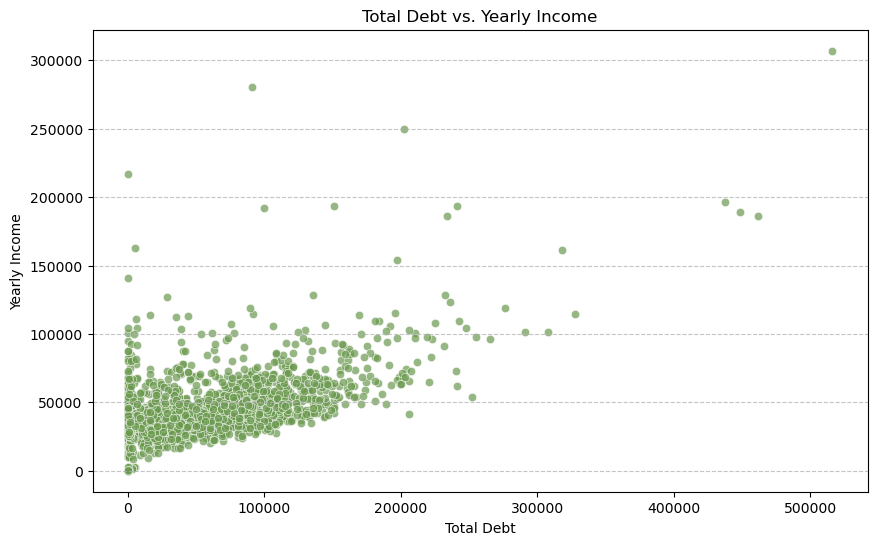

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot using seaborn
sns.scatterplot(x='total_debt', y='yearly_income', data=df, color='#6a994e', alpha=0.7)

# Customize the plot with labels and title
plt.xlabel('Total Debt')
plt.ylabel('Yearly Income')
plt.title('Total Debt vs. Yearly Income')

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis='y')

# Show the plot
plt.show()

In [10]:
# Outlier Elimination

# Calculate the first (Q1) and third (Q3) quartiles for 'total_debt' and 'yearly_income'
Q1_debt = df['total_debt'].quantile(0.25)
Q3_debt = df['total_debt'].quantile(0.75)
IQR_debt = Q3_debt - Q1_debt

Q1_income = df['yearly_income'].quantile(0.25)
Q3_income = df['yearly_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Define the lower and upper bounds for 'total_debt' and 'yearly_income'
lower_bound_debt = Q1_debt - 1.5 * IQR_debt
upper_bound_debt = Q3_debt + 1.5 * IQR_debt

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Filter out rows where 'total_debt' or 'yearly_income' are outside the bounds
df_no_outliers = df[(df['total_debt'] >= lower_bound_debt) & (df['total_debt'] <= upper_bound_debt) &
                    (df['yearly_income'] >= lower_bound_income) & (df['yearly_income'] <= upper_bound_income)]

# Remove Outliers from the dataframe:
df2 = df_no_outliers

# Check the shape of the new DataFrame
print(f"Original DataFrame: {df.shape}")
print(f"DataFrame Outliers Removed: {df_no_outliers.shape}")

Original DataFrame: (1917, 18)
DataFrame Outliers Removed: (1783, 18)


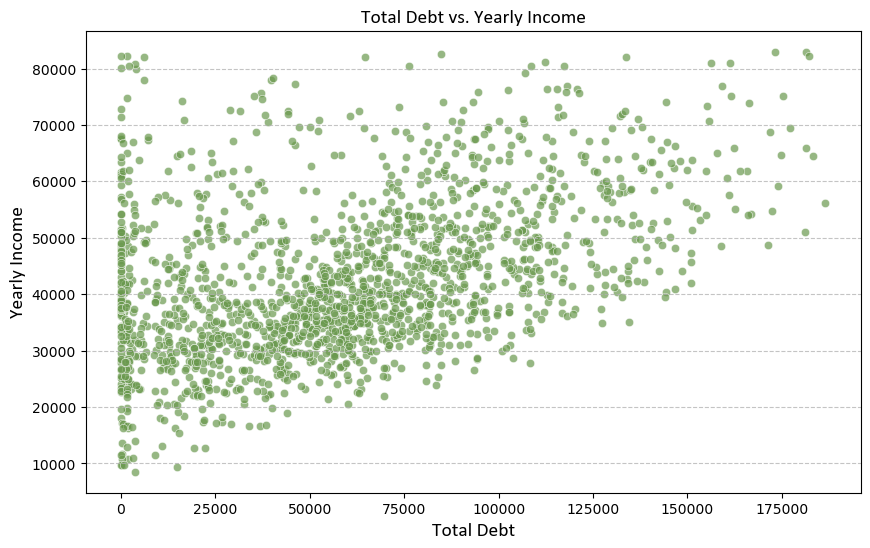

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot using seaborn
sns.scatterplot(x='total_debt', y='yearly_income', data=df2, color='#6a994e', alpha=0.7)

# Customize the plot with labels and title
plt.xlabel("Total Debt", fontfamily='Calibri', fontsize=14)
plt.ylabel("Yearly Income", fontfamily='Calibri', fontsize=14)
plt.title('Total Debt vs. Yearly Income', fontfamily='Calibri', fontsize=14)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis='y')

# Show the plot
plt.show()

In [12]:
# Define the function to perform regression
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Canvas Size
    plt.figure(figsize=(15, 8))

    # Create scatter plot
    plt.scatter(x_values, y_values, color='#6a994e', edgecolor='black', s=75)
    plt.plot(x_values, regress_values, color='black', linewidth=3)

    # Incorporate the other graph properties
    plt.xlabel(x_label, fontfamily='Calibri', fontsize=14)
    plt.ylabel(y_label, fontfamily='Calibri', fontsize=14)
    plt.title(f"{x_label} vs. {y_label}", fontweight="bold", fontfamily='Calibri', fontsize=20)

    # Background Grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotation
    plt.annotate(line_eq, annotation, fontsize=14, color="black")

y = 0.15x + 33633.46


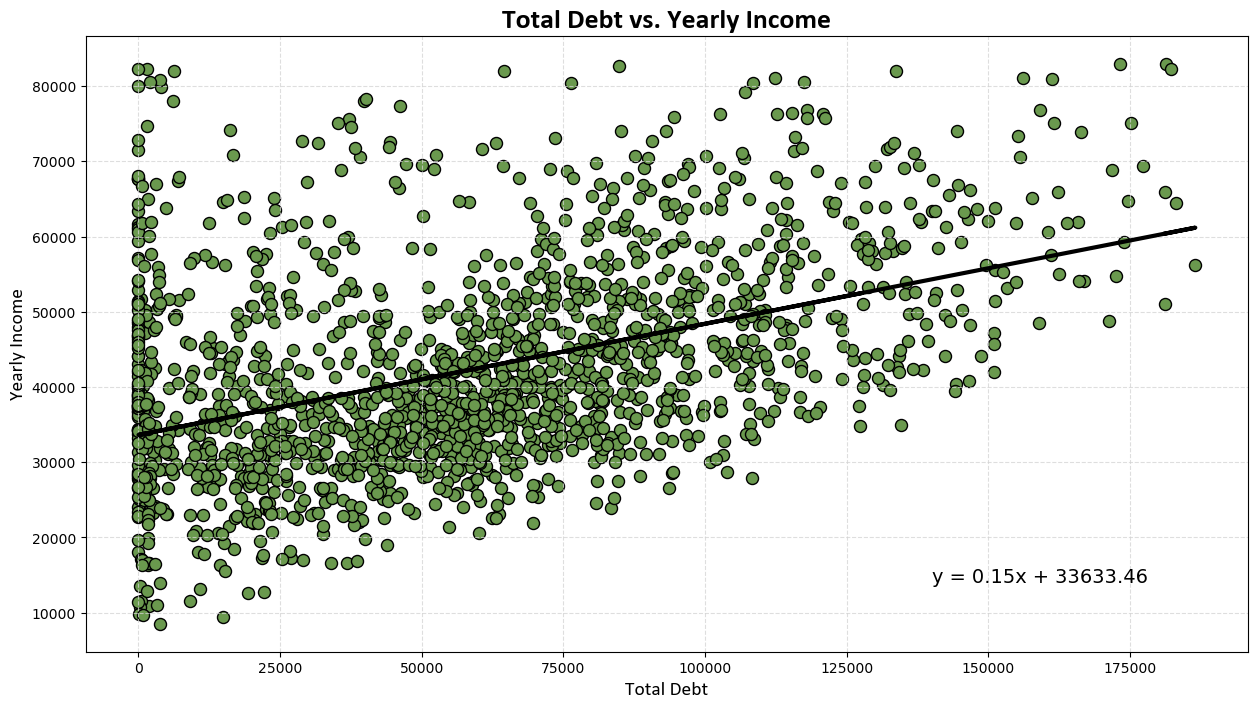

In [13]:
# Linear regression on Debt to Income
x_values = df2.total_debt
y_values = df2.yearly_income
x_label = "Total Debt"
y_label = "Yearly Income"
annotation = (140000, 14000)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

y = 748.73x + 41254.13


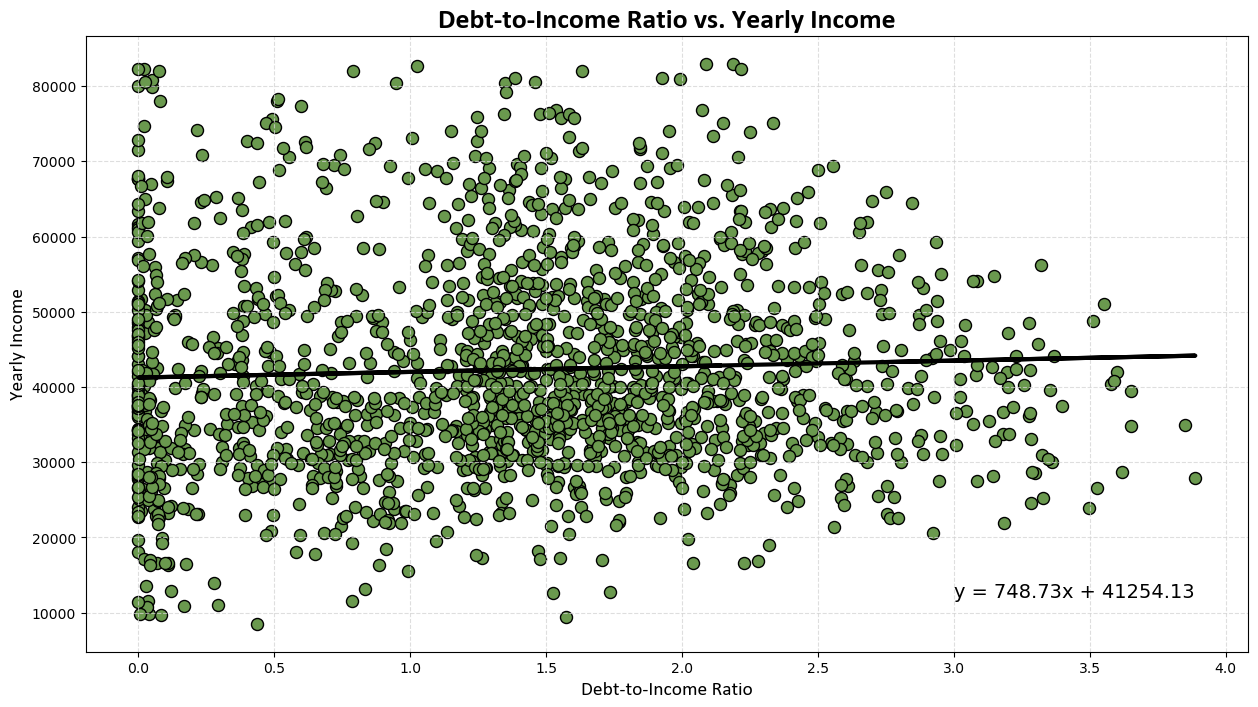

In [14]:
# Linear regression on Debt-to-Income vs Yearly Income
x_values_dti = df2.debt_to_income
y_values_income = df2.yearly_income
x_label_dti = "Debt-to-Income Ratio"
y_label_income = "Yearly Income"
annotation_dti = (3, 12000)
do_regression_plot(x_values_dti, y_values_income, x_label_dti, y_label_income, annotation_dti)

y = -0.0x + 719.88


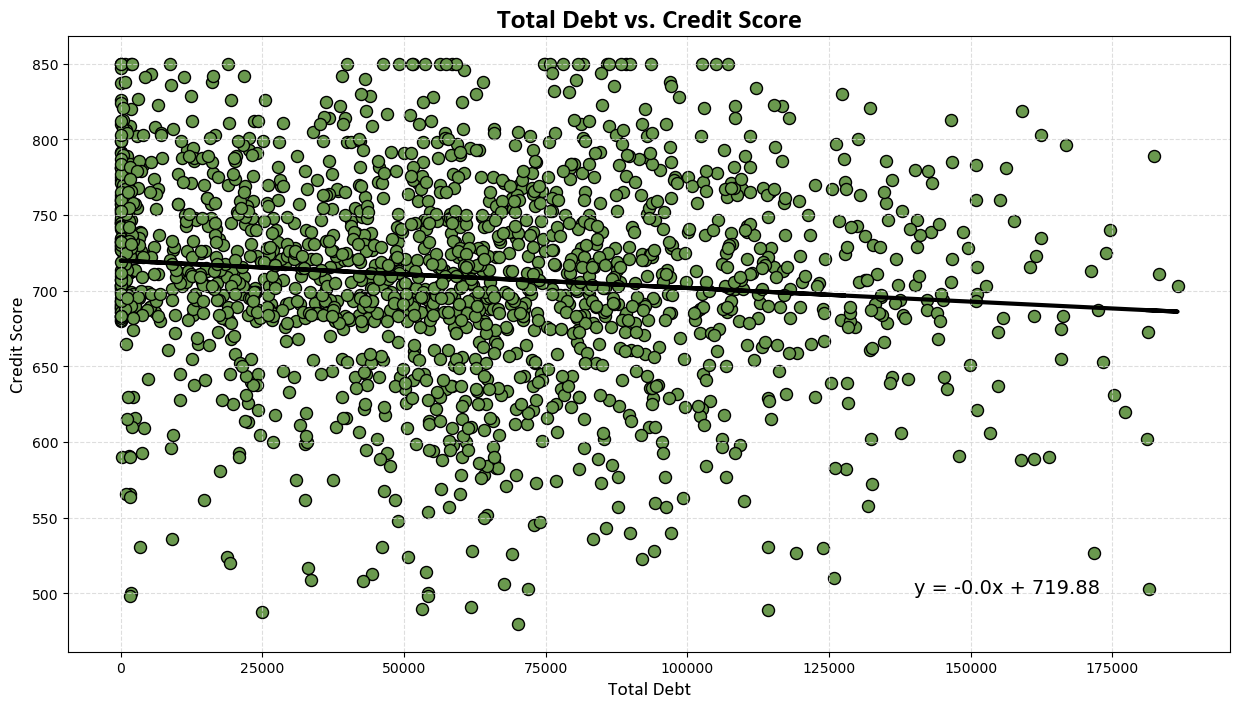

In [15]:
# Linear regression on total debt by credit class
x_values_dti_credit = df2.total_debt
y_values_credit = df2.credit_score
x_label_dti_credit = "Total Debt"
y_label_credit = "Credit Score"
annotation_dti_credit = (140000, 500)
do_regression_plot(x_values_dti_credit, y_values_credit, x_label_dti_credit, y_label_credit, annotation_dti_credit)

y = -9.72x + 722.65


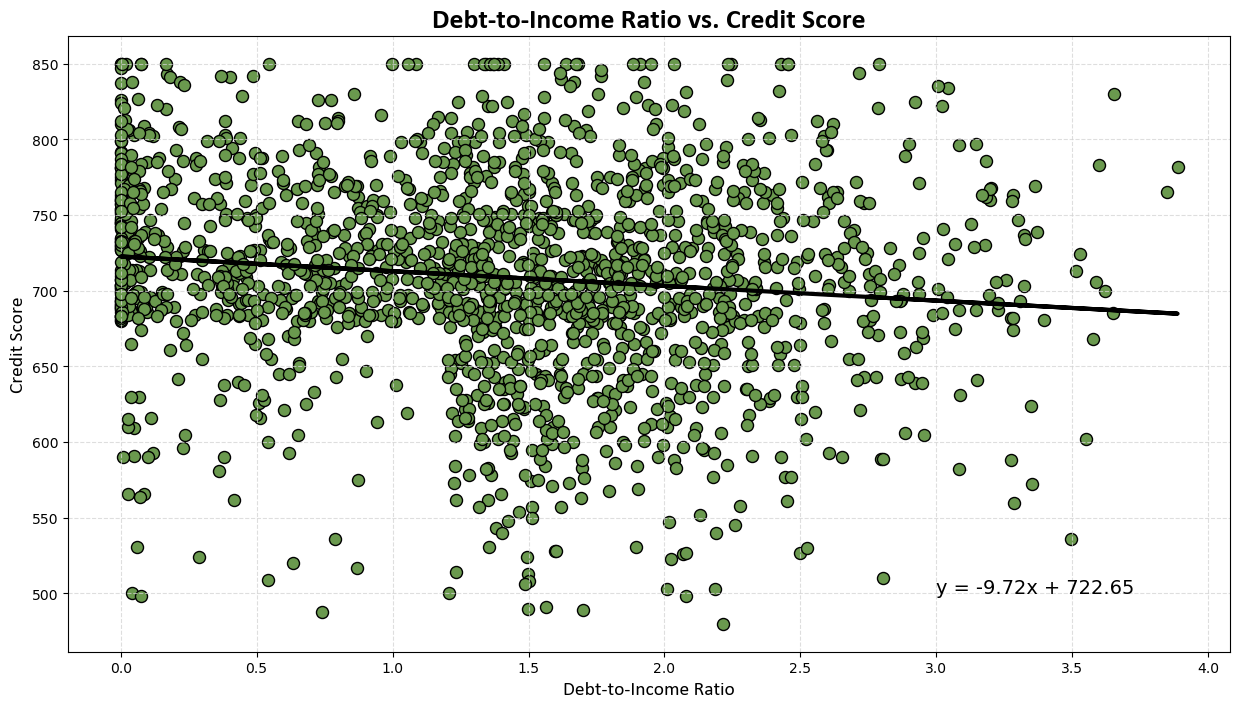

In [16]:
# Linear regression on Debt-to-Income vs Credit Score
x_values_dti_credit = df2.debt_to_income
y_values_credit = df2.credit_score
x_label_dti_credit = "Debt-to-Income Ratio"
y_label_credit = "Credit Score"
annotation_dti_credit = (3, 500)
do_regression_plot(x_values_dti_credit, y_values_credit, x_label_dti_credit, y_label_credit, annotation_dti_credit)

y = -7.99x + 56.59


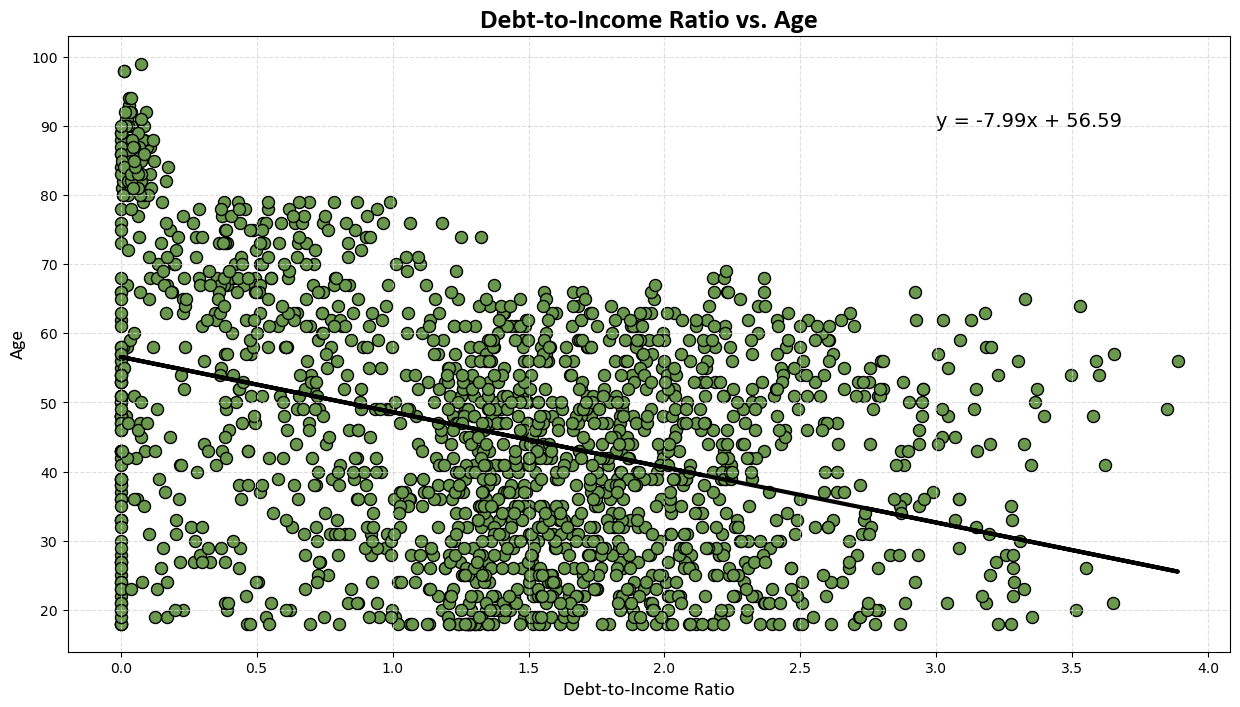

In [17]:
# Linear regression on Debt-to-Income vs Age
x_values_dti_credit = df2.debt_to_income
y_values_credit = df2.current_age
x_label_dti_credit = "Debt-to-Income Ratio"
y_label_credit = "Age"
annotation_dti_credit = (3, 90)
do_regression_plot(x_values_dti_credit, y_values_credit, x_label_dti_credit, y_label_credit, annotation_dti_credit)

C:\Users\camei\AppData\Local\Temp\ipykernel_29776\931046996.py:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='age_group',hue='age_group', y='debt_to_income', data=data, palette=gradient_colors)


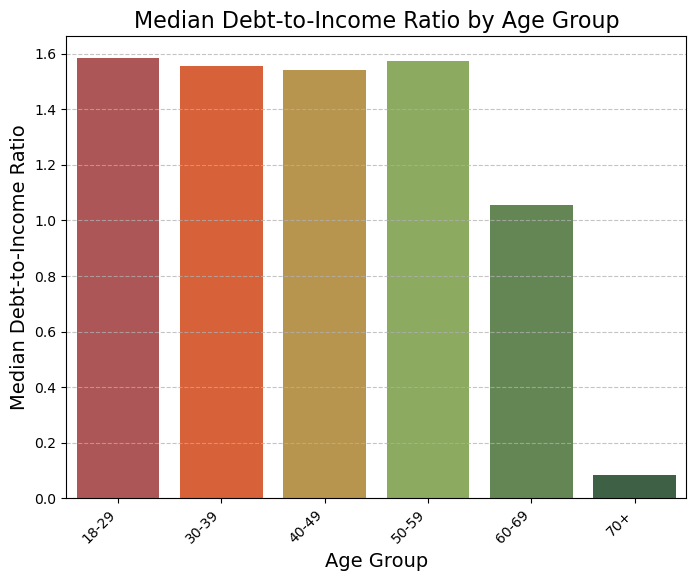

In [18]:
df2 = df.copy()

# Generate a bar plot showing the median to debt-to-income levels by age group Pandas.

# Data Viz Recipe

# Define age bins and labels to categorize the age column into groups
age_bins = [18, 30, 40, 50, 60, 70, 100]  # Define age groups
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Age group labels

# Create a new column 'age_group' by categorizing 'age'
df2['age_group'] = pd.cut(df['current_age'], bins=age_bins, labels=age_labels, right=False)

# Group by the 'age_group' and calculate the median debt-to-income for each group
data = df2.groupby('age_group', observed=True)['debt_to_income'].median().reset_index()

# Define the color palette
coolors_palette = ["#bc4749", "#ff5714", "#a7c957","#6a994e", "#386641"]

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Generate a gradient of 51 colors from the colormap
gradient_colors = cmap(np.linspace(0, 1, 6))

# Change Canvas Size
plt.figure(figsize=(8, 6))

# Create basic plot using seaborn
sns.barplot(x='age_group',hue='age_group', y='debt_to_income', data=data, palette=gradient_colors)
# sns.barplot(x='age_group',hue='age_group', y='debt_to_income', data=data, color='#386641')
# sns.barplot(x='age_group', y='debt_to_income', data=data, color='#386641')

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75, axis="y")

# Customize the plot with labels and title
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Median Debt-to-Income Ratio',fontsize=14)
plt.title('Median Debt-to-Income Ratio by Age Group',fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

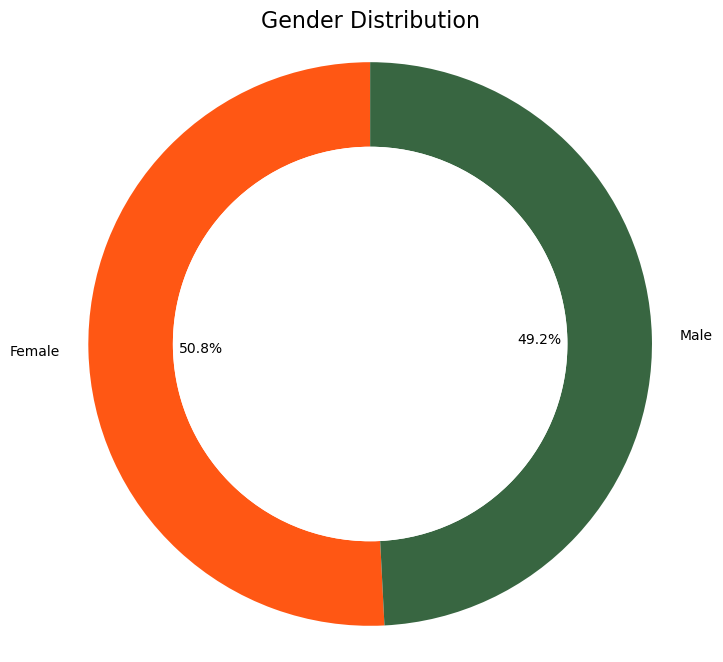

In [19]:
# Count the number of occurrences of each gender
gender_counts = df2['gender'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie chart, 'wedgeprops' defines the size of the hole in the center (donut effect)
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
       colors=["#ff5714", "#386641"], wedgeprops={'width': 0.3})

# Add a circle at the center to make the pie chart look like a donut
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Gender Distribution',fontsize=16)

# Display the plot
plt.show()

C:\Users\camei\AppData\Local\Temp\ipykernel_29776\2987537073.py:26: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=average_per_capita_by_state,


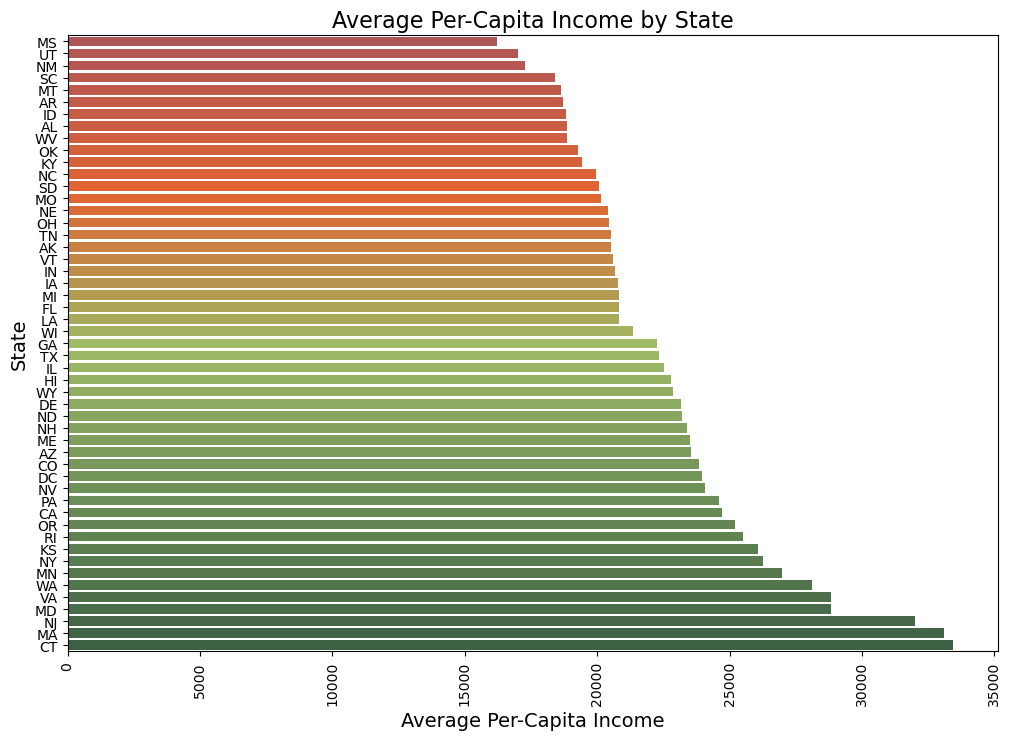

In [20]:
# Generate a hbar plot showing the median to debt-to-income levels by state.

# Data Viz Recipe
# Calculate the average per_caita income by state
average_per_capita_by_state = df.groupby('state')['per_capita_income'].mean().reset_index()

# Define the color palette
coolors_palette = ["#bc4749", "#ff5714", "#a7c957","#6a994e", "#386641"]

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Generate a gradient of 51 colors from the colormap
gradient_colors = cmap(np.linspace(0, 1, 51))

# To make the data more readable, sort by per_capita
average_per_capita_by_state = average_per_capita_by_state.sort_values('per_capita_income', ascending=True)

# Define the custome palette
coolors_palette = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749"]

# Change Canvas Size
plt.figure(figsize=(12, 8))

# Create basic plot using seaborn
sns.barplot(data=average_per_capita_by_state,
            x='per_capita_income',
            y='state',
            hue='state',
            palette=gradient_colors,
            # palette='viridis',
            legend=False)

# Customize the plot with labels and title
plt.xlabel('Average Per-Capita Income', fontsize=14)
plt.ylabel('State',fontsize=14)
plt.title('Average Per-Capita Income by State',fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Display the plot
plt.show()

C:\Users\camei\AppData\Local\Temp\ipykernel_29776\1620681521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='debt_to_income', data=df2, palette=["#ff5714", "#386641"])


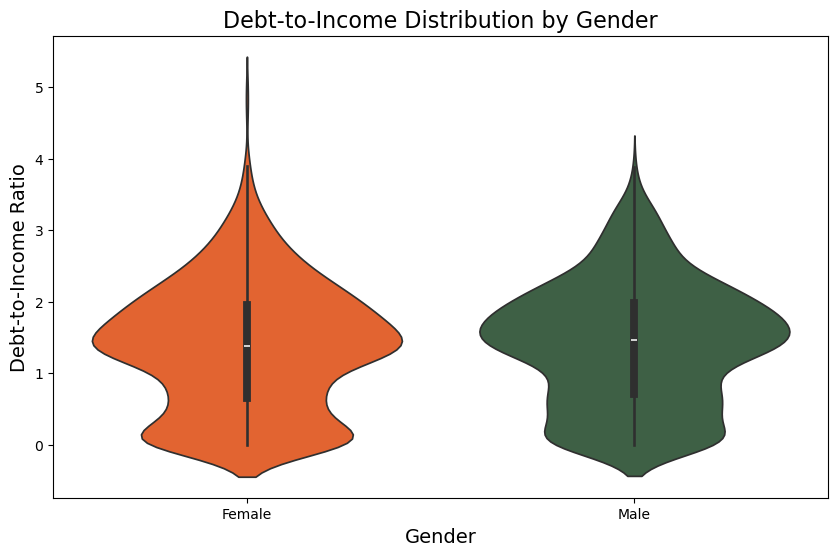

T-statistic: 0.9904944979315766
P-value: 0.32205760966566954
There is no significant difference between male and female debt-to-income ratios.


In [21]:
# Create a split violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='debt_to_income', data=df2, palette=["#ff5714", "#386641"])

# Add labels and title
plt.title('Debt-to-Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Debt-to-Income Ratio', fontsize = 14)

# Display the plot
plt.show()

# Perform a t-test to compare debt-to-income between males and females
male_dti = df[df['gender'] == 'Male']['debt_to_income']
female_dti = df[df['gender'] == 'Female']['debt_to_income']

# Perform t-test
t_stat, p_value = ttest_ind(male_dti, female_dti, nan_policy='omit')

# Display the results of the t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference between male and female debt-to-income ratios.")
else:
    print("There is no significant difference between male and female debt-to-income ratios.")

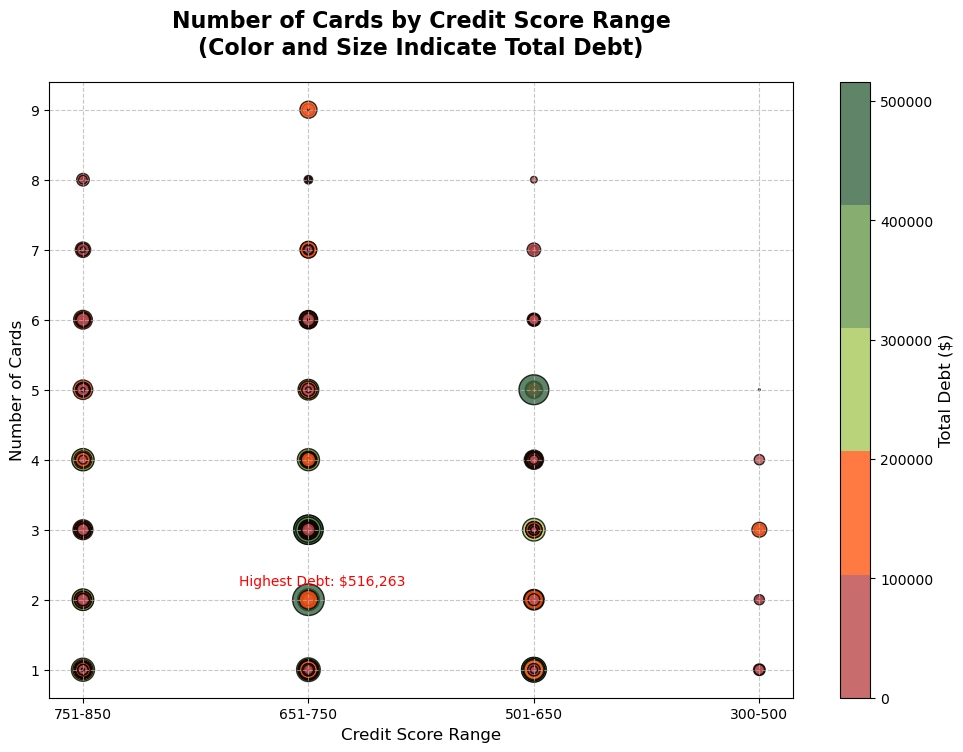

In [22]:
# Categorize credit scores into ranges
bins = [300, 500, 650, 750, 850]
labels = ['300-500', '501-650', '651-750', '751-850']
df2['credit_score_range'] = pd.cut(df2['credit_score'], bins=bins, labels=labels, include_lowest=True)

# Define custom colors
custom_colors = ["#BC4749", "#FF5714", "#A7C957", "#6A994E", "#386641"]
cmap = mcolors.ListedColormap(custom_colors)

# Create scatter plot
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    df2['credit_score_range'],
    df2['num_credit_cards'],
    c=df2['total_debt'],
    s=df2['total_debt'] / 1000,
    cmap=cmap,
    edgecolor='black',
    alpha=0.8
)

# Add colorbar and labels
plt.colorbar(sc).set_label('Total Debt ($)', fontsize=12)
plt.title('Number of Cards by Credit Score Range\n(Color and Size Indicate Total Debt)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Credit Score Range', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

# Annotate highest total debt
highest_debt_row = df2[df2['total_debt'] == df2['total_debt'].max()]
for _, row in highest_debt_row.iterrows():
    plt.annotate(
        f"Highest Debt: ${row['total_debt']:,.0f}",
        (row['credit_score_range'], row['num_credit_cards']),
        textcoords="offset points", xytext=(10, 10),
        ha='center', fontsize=10, color='red'
    )

# Adjust and display plot
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

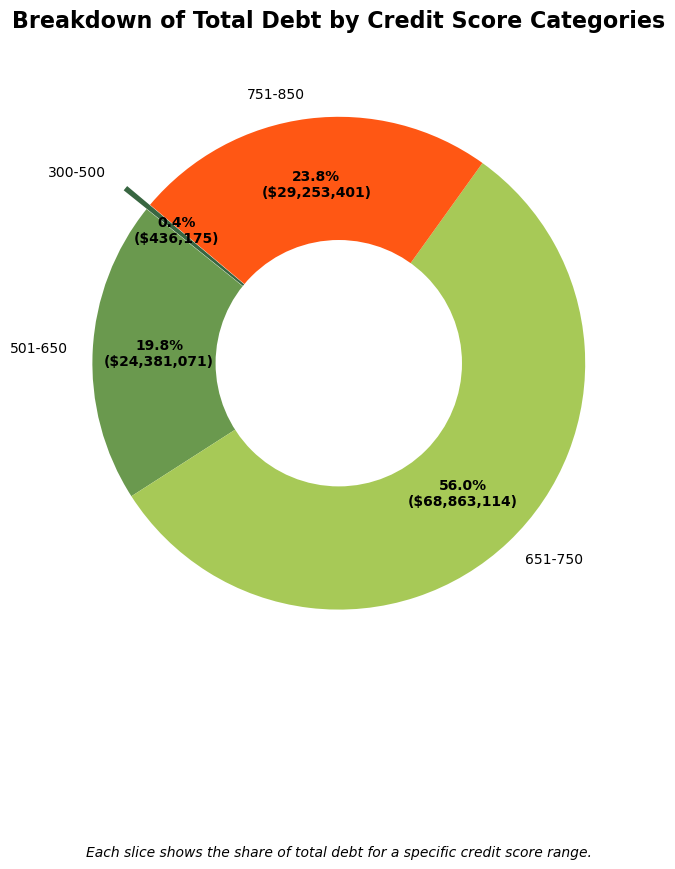

In [23]:
# Sum total debt by credit score range
debt_by_range = (
    df2.groupby('credit_score_range', observed=False)['total_debt']
    .sum()
    .reset_index()
)
# Define colors and explode settings for pie chart slices
colors = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749"]
explode = [0] * len(debt_by_range)

# Explode slice with the lowest total debt
explode[0] = 0.12


# Create pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    debt_by_range['total_debt'],
    labels=debt_by_range['credit_score_range'],
    autopct=lambda pct: f"{pct:.1f}%\n(${(pct/100)*debt_by_range['total_debt'].sum():,.0f})",
    startangle=140,
    pctdistance=0.73,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 10},
)

# Add a white circle to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
# Add title and annotation
plt.title('Breakdown of Total Debt by Credit Score Categories', fontsize=16, fontweight='bold', pad=20)
plt.text(
    0, -2,
    'Each slice shows the share of total debt for a specific credit score range.',
    ha='center', fontsize=10, style='italic'
)

# text inside pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')  
    autotext.set_fontsize(10) 
    autotext.set_fontweight("bold")
    autotext.set_horizontalalignment('center')  
    autotext.set_verticalalignment('center') 
    
# Final plot and adjustments
plt.show()

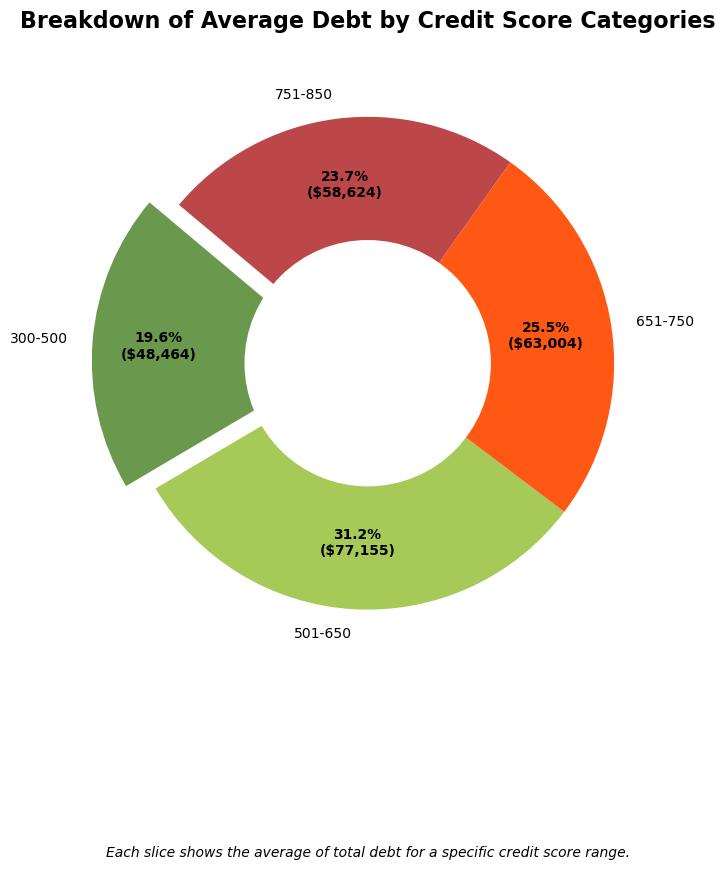

In [24]:
# Sum total debt by credit score range
debt_by_range = (
    df2.groupby('credit_score_range', observed=False)['total_debt']
    .mean()
    .reset_index()
)
# Define colors and explode settings for pie chart slices
colors = ["#6a994e", "#a7c957", "#ff5714", "#bc4749"]
explode = [0] * len(debt_by_range)

# Explode slice with the lowest total debt
explode[0] = 0.12


# Create pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    debt_by_range['total_debt'],
    labels=debt_by_range['credit_score_range'],
    autopct=lambda pct: f"{pct:.1f}%\n(${(pct/100)*debt_by_range['total_debt'].sum():,.0f})",
    startangle=140,
    pctdistance=0.73,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 10},
)

# Add a white circle to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
# Add title and annotation
plt.title('Breakdown of Average Debt by Credit Score Categories', fontsize=16, fontweight='bold', pad=20)
plt.text(
    0, -2,
    'Each slice shows the average of total debt for a specific credit score range.',
    ha='center', fontsize=10, style='italic'
)

# text inside pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')  
    autotext.set_fontsize(10) 
    autotext.set_fontweight("bold")
    autotext.set_horizontalalignment('center')  
    autotext.set_verticalalignment('center') 
    
# Final plot and adjustments
plt.show()

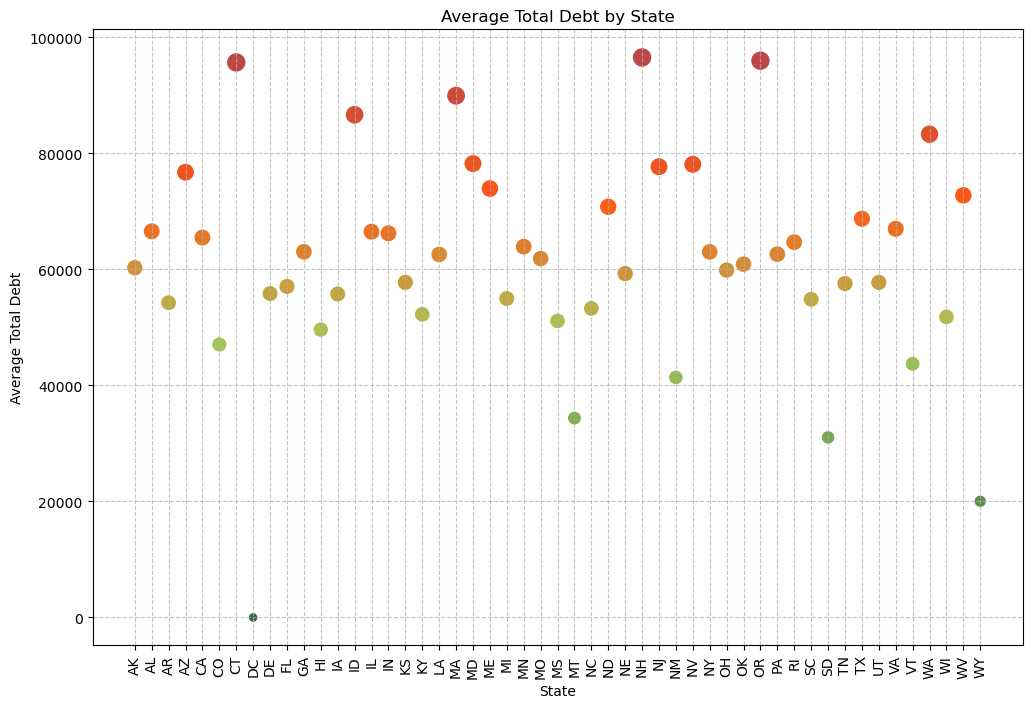

In [25]:

# Calculate the average debt-to-income ratio by state
state_avg_debt = df2.groupby('state')['total_debt'].mean().reset_index()

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Use scatterplot with the custom colormap for color mapping
sns.scatterplot(x='state', 
                y='total_debt', 
                data=state_avg_debt,
                hue='total_debt',  
                palette=cmap, 
                size='total_debt',  
                sizes=(50, 200),  
                legend=None) 

# Customize the plot with labels and title
plt.xlabel('State')
plt.ylabel('Average Total Debt')
plt.title('Average Total Debt by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75)

# Display the plot
plt.show()

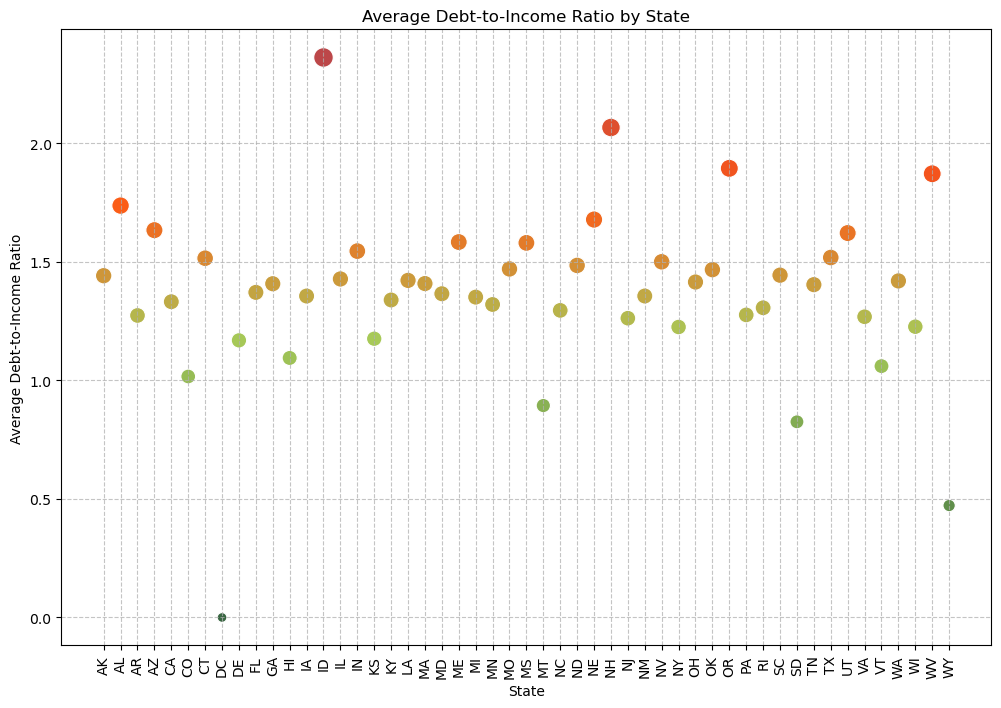

In [26]:
# Define the color palette
coolors_palette = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749"]

# Calculate the average debt-to-income ratio by state
state_avg_debt_to_income = df2.groupby('state')['debt_to_income'].mean().reset_index()

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Use scatterplot with the custom colormap for color mapping
sns.scatterplot(x='state', 
                y='debt_to_income', 
                data=state_avg_debt_to_income,
                hue='debt_to_income',  # This applies the color scale based on debt-to-income
                palette=cmap,  # Apply the custom colormap
                size='debt_to_income',  # Optional: size can vary with debt-to-income
                sizes=(50, 200),  # Adjust size range
                legend=None)  # Remove the legend

# Customize the plot with labels and title
plt.xlabel('State')
plt.ylabel('Average Debt-to-Income Ratio')
plt.title('Average Debt-to-Income Ratio by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines to improve readability
plt.grid(True, linestyle='--', alpha=0.75)

# Display the plot
plt.show()

In [27]:
state_avg_debt_to_income

,state,debt_to_income
0,AK,1.441390
1,AL,1.737096
2,AR,1.273720
3,AZ,1.633420
4,CA,1.331661
5,CO,1.016355
6,CT,1.515108
7,DC,0.000000
8,DE,1.168775
9,FL,1.371125


In [28]:
# Merge with df2 to get latitude, longitude, and state name in new df
merged_df = pd.merge(state_avg_debt_to_income,
                     df2[['state', 'state_lat', 'state_long', 'state_name']].drop_duplicates(),
                     on='state', how='left')

# Create a new DataFrame with the desired columns
df3 = merged_df[['state', 'debt_to_income', 'state_lat', 'state_long', 'state_name']].copy()

# Rename debt_to_income column to avg_debt_to_income
df3.rename(columns={'debt_to_income': 'avg_debt_to_income'}, inplace=True)

df3.reset_index(drop=True, inplace=True)

# Check
df3

,state,avg_debt_to_income,state_lat,state_long,state_name
0,AK,1.441390,61.302501,-158.775020,Alaska
1,AL,1.737096,32.601011,-86.680736,Alabama
2,AR,1.273720,34.751928,-92.131378,Arkansas
3,AZ,1.633420,34.168219,-111.930907,Arizona
4,CA,1.331661,37.271875,-119.270415,California
5,CO,1.016355,38.997934,-105.550567,Colorado
6,CT,1.515108,41.518783,-72.757507,Connecticut
7,DC,0.000000,38.899349,-77.014567,District of Columbia
8,DE,1.168775,39.145251,-75.418921,Delaware
9,FL,1.371125,27.994402,-81.760254,Florida


In [59]:
# Define the Coolors color palette from green to red
coolors_palette = ["#6a994e", "#a7c957", "#ff5714", "#bc4749"]

# Set U.S. map
map = folium.Map(
    location=[39.8283, -98.5795], 
    zoom_start=5,
    width='80%',  
    height='80%' 
)

# Create the gradient
colormap = branca.colormap.LinearColormap(coolors_palette, vmin=df3['avg_debt_to_income'].min(), vmax=df3['avg_debt_to_income'].max()).to_step(n=5)

# Add markers 
for index, row in df3.iterrows():
    # Determine the color - debt to income
    color = colormap(row['avg_debt_to_income'])
    
    # Create a marker
    folium.Marker(
        location=[row['state_lat'], row['state_long']],
        popup=f"{row['state_name']}: {row['avg_debt_to_income']:.2f}",
        tooltip=f"{row['state_name']} - Avg Debt-to-Income: {row['avg_debt_to_income']:.2f}",
        icon=folium.Icon(color='white', icon_color=color)  # Apply the color to the marker icon
    ).add_to(map)

# Add the colormap legend to the map
colormap.add_to(map)

# Display
map

In [61]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   client_id           1917 non-null   int64   
 1   current_age         1917 non-null   int64   
 2   birth_year          1917 non-null   int64   
 3   birth_month         1917 non-null   int64   
 4   gender              1917 non-null   object  
 5   address             1917 non-null   object  
 6   state               1917 non-null   object  
 7   latitude            1917 non-null   float64 
 8   longitude           1917 non-null   float64 
 9   per_capita_income   1917 non-null   int64   
 10  yearly_income       1917 non-null   int64   
 11  total_debt          1917 non-null   int64   
 12  credit_score        1917 non-null   int64   
 13  num_credit_cards    1917 non-null   int64   
 14  debt_to_income      1917 non-null   float64 
 15  state_lat           1917 non-null   fl